# Лабораторная работа 3, задача 3, вариант 17

In [1]:
import matplotlib.pyplot as plt

Возьмем метод решения системы с помощью LU разложения из первой лабораторной первой части

In [2]:
def lup(l, u, pi, b, n):
    x = [0 for i in range(n)]
    y = [0 for i in range(n)]

    for i in range(n):
        summ = 0
        for j in range(i):
            summ += l[i][j] * y[j]

        y[i] = b[pi[i]] - summ

    for i in range(n - 1, -1, -1):
        sec_summ = 0
        for j in range(i + 1, n):
            sec_summ += u[i][j] * x[j]

        x[i] = (y[i] - sec_summ) / u[i][i]

    x = [round(x[i], 5) for i in range(len(x))]
    return x

def lupdecompose(a, n):
    pi = [i for i in range(n)]
    tmp_k = 0
    for k in range(n):
        p = 0
        for i in range(k, n):
            if abs(a[i][k]) > p:
                p = abs(a[i][k])
                tmp_k = i
        # if p == 0:
        #     #raise MatrixException('Matrix is degenerate')
        pi[k], pi[tmp_k] = pi[tmp_k], pi[k]

        for i in range(n):
            a[k][i], a[tmp_k][i] = a[tmp_k][i], a[k][i]
        for i in range(k + 1, n):
            a[i][k] = a[i][k] / a[k][k]
            for j in range(k + 1, n):
                a[i][j] = a[i][j] - a[i][k] * a[k][j]
    return pi


def get_lu(a):
    n = len(a)
    l = [[0] * n for i in range(0, n)]
    u = [[0] * n for i in range(0, n)]

    for i in range(n):
        l[i][i] = 1
        for j in range(n):
            if j < i:
                l[i][j] = a[i][j]
            else:
                u[i][j] = a[i][j]
    return l, u    

In [14]:
def polynomial(x, values):
    return sum([c * (x ** i) for i, c in enumerate(values)])

In [8]:
# квадрат ошибки
def sse(f, y): 
    return round(sum([(f_i - y_i) ** 2 for f_i, y_i in zip(f, y)]), 5)

In [4]:
# метод наименьших квадратов
def mls(n, x, y):
    matrix = [[] for _ in range(n + 1)]
    size = len(matrix)
    for i in range(n + 1):
        for j in range(n + 1):
            matrix[i].append(sum([x_j ** (i + j) for x_j in x]))

    b = [0 for _ in range(n + 1)]
    for i in range(n + 1):
        b[i] = sum([y_j * (x_j ** i) for x_j, y_j in zip(x, y)])

    P = lupdecompose(matrix, size)
    l, u = get_lu(matrix)
    new_b = lup(l, u, P, b, size)
    return [round(i, 5) for i in new_b]

In [5]:
def fprinter(coefs):
    n = len(coefs)
    f = f'F{n - 1}(x) = '
    for i in range(n):
        f += f'{coefs[i]}x^{i} + '
    f = f[:-2]
    return f

Вариант 17:

<table>
  <tr>
  <td>i</td><td>0</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td>
  </tr>
  <tr>
  <td>$$x_i$$</td><td>0.1</td><td>	0.5</td><td>	0.9</td><td>	1.3</td><td>	1.7</td><td>	2.1</td>
  </tr>  
  <tr>
  <td>$$y_i$$</td><td>-2.2026</td><td>-0.19315</td><td>0.79464</td><td>1.5624</td><td>2.2306</td><td>2.8419</td>
  </tr>    
</table>

In [6]:
x = [0.1,	0.5,	0.9,	1.3,	1.7,	2.1]
y = [-2.2026,	-0.19315,	0.79464,	1.5624,	2.2306,	2.8419]

In [18]:
F = []
err = []
coefs = []

for degree in [1, 2, 3]:
    print(f'Degree = {degree}')
    coefs.append(mls(degree, x, y))
    print(fprinter(coefs[degree - 1]))
    F.append([polynomial(i, coefs[degree - 1]) for i in x])
    err.append(sse(F[degree - 1], y))

Degree = 1
F1(x) = -1.77444x^0 + 2.37582x^1 
Degree = 2
F2(x) = -2.46046x^0 + 4.40618x^1 + -0.92289x^2 
Degree = 3
F3(x) = -2.79218x^0 + 6.52318x^1 + -3.39847x^2 + 0.75018x^3 


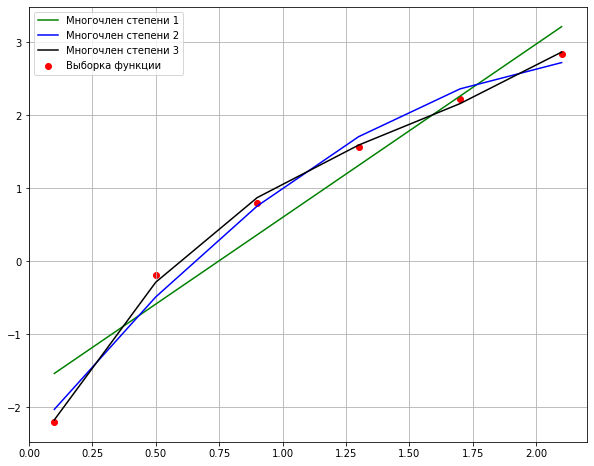

In [25]:
plt.figure(figsize=(10,8))
plt.scatter(x, y, color='r', label='Выборка функции')
ind = [1,2,3]
colors = ['green','blue','black']
for f,i,c in zip(F,ind,colors):
  plt.plot(x, f, color=c, label='Многочлен степени '+str(i))
  # plt.plot(x, f, color='g', label='Многочлен второй степени')
plt.legend(loc='best')
plt.grid()
plt.show()

In [26]:
k = 1
for i in err:
    print(f'Error of F{k} = {i}')
    k += 1

Error of F1 = 0.98541
Error of F2 = 0.17139
Error of F3 = 0.02202
